# Evaluation per experimental parameter of two values

In [45]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_visualizations import flatten_data, plots_per_condition, filter_data, plot_combined_boxplots, descreptives
import csv

# remove waringns
import warnings
warnings.filterwarnings("ignore")

## Load data for evaluation: Filter for one experimental parameter

In [46]:
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)

# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (2880, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,20,...,0.866526,0.025,1.0,0.962943,2,1,5,4,1,7
1,rf,200,100000,8,0,identity,5,5,200,20,...,0.851083,0.025,1.0,0.952666,3,1,5,3,1,5
2,rf,200,100000,8,0,identity,5,5,200,20,...,0.892708,0.025,1.0,0.955146,2,1,7,3,1,6
3,rf,200,100000,8,0,identity,5,5,200,20,...,0.858054,0.025,1.0,0.954002,2,1,4,2,1,6
4,rf,200,100000,8,0,identity,5,5,200,20,...,0.847100,0.025,1.0,0.940897,3,1,6,4,1,5


Filter for one variable of hyperparameter_options:

In [47]:
#TBD: iteratate over all combinations

hyperparameter_options = {'n_train': [200, 1000],
                          'transformation': ['identity', 'log', 'sqrt'],
                          'noise': [0, 3],
                          'group_size': [5, 10]}
print('number of combinaitons of experimental set-up:', 2*3*2*2)

number of combinaitons of experimental set-up: 24


In [48]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": 'identity',
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": None,
    "model_info_scoring": 'neg_mean_squared_error'
}

data_filtered_1, data_filtered_2, value1, value2, filtered_parameter = filter_data(data, conditions= parameter_grid, value1= 0, value2 =3)

path_evaluation_tables = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/"
path_evaluation_plots = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/plots/"

if not os.path.exists(path_evaluation_tables + filtered_parameter):
    os.makedirs(path_evaluation_tables + filtered_parameter)
    print('Folder for tables created:', filtered_parameter)

if not os.path.exists(path_evaluation_plots + filtered_parameter):
    os.makedirs(path_evaluation_plots + filtered_parameter)
    print('Folder for plots created:', filtered_parameter)

data_filtered_1 shape: (120, 75)
data_filtered_2 shape: (120, 75)
Folder for tables created: model_info_noise
Folder for plots created: model_info_noise


## Descriptives
### hyperparameters_same


In [49]:
#  'hyperparameters_same'
hyp_same1 = data_filtered_1['hyperparameters_same'].value_counts()
hyp_diff_rel1= hyp_same1[0]/(hyp_same1[0]+hyp_same1[1])
print(filtered_parameter, value1, hyp_same1)
print(hyp_diff_rel1)

hyp_same2 = data_filtered_2['hyperparameters_same'].value_counts()
hyp_diff_rel2= hyp_same2[0]/(hyp_same2[0]+hyp_same2[1])
print(filtered_parameter, value2, hyp_same2)
print(hyp_diff_rel2)

model_info_noise 0 hyperparameters_same
False    84
True     36
Name: count, dtype: int64
0.7
model_info_noise 3 hyperparameters_same
False    104
True      16
Name: count, dtype: int64
0.8666666666666667


#### cv_folds_descreptives_stratified
-> 'cv_folds_descriptives_unstratified_ks_statistic',
       'cv_folds_descriptives_unstratified_p_value',
       'cv_folds_descriptives_unstratified_intersection_area',
       'cv_folds_descriptives_stratified_ks_statistic',
       'cv_folds_descriptives_stratified_p_value',
       'cv_folds_descriptives_stratified_intersection_area',


In [50]:
def descreptives(data, path_plots):
    statistics = ['ks_statistic', 'p_value', 'intersection_area']
    mean_stratified_list = []
    sd_stratified_list = []
    mean_unstratified_list = []
    sd_unstratified_list = []
    mean_diff = []
    sd_diff = []

    for s in statistics:
        # filter stratified and unstratified descreptives columns
        s_stratified = '_stratified_' + s
        s_unstratified = '_unstratified_' + s
        s_stratified = [col for col in data.columns if s_stratified in col]
        s_unstratified = [col for col in data.columns if s_unstratified in col]

        plot_combined_boxplots(data_x= data[s_stratified], data_y = data[s_unstratified], title= s, path=path_plots + '_' + s)
        
        # values for stratified
        mean_stratified = data[s_stratified].mean()[0]
        sd_stratified = data[s_stratified].std()[0]
        mean_stratified_list.append(mean_stratified)
        sd_stratified_list.append(sd_stratified)

        # values for unstratified
        mean_unstratified = data[s_unstratified].mean()[0]
        sd_unstratified = data[s_unstratified].std()[0]
        mean_unstratified_list.append(mean_unstratified)
        sd_unstratified_list.append(sd_unstratified)

        # diference
        mean_diff.append(mean_stratified - mean_unstratified)
        sd_diff.append(sd_stratified - sd_unstratified)
    df_result = pd.DataFrame({'mean_stratified': mean_stratified_list, 'sd_stratified': sd_stratified_list, 
                              'mean_unstratified': mean_unstratified_list, 'sd_unstratified': sd_unstratified_list, 
                              'mean_diff' : mean_diff, 'sd_diff' : sd_diff}, #@Nadja: drop sd_diff
                              index= statistics)
    
    return df_result


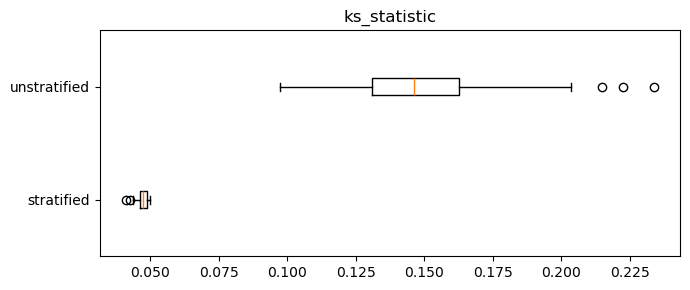

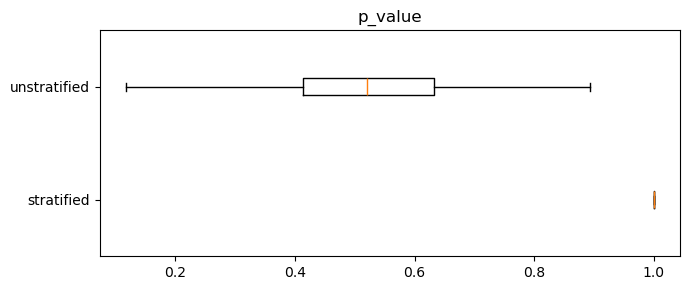

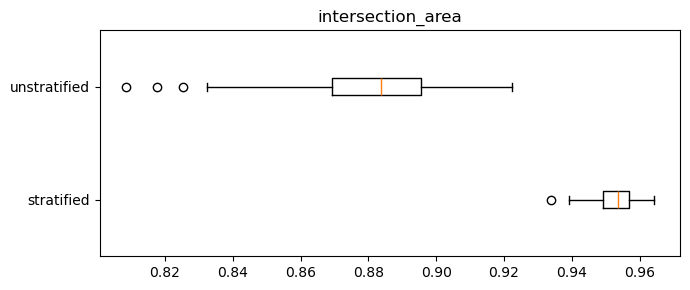

In [51]:
result_descreptives1 = descreptives(data_filtered_1, path_evaluation_plots + filtered_parameter + '_' + str(value1))

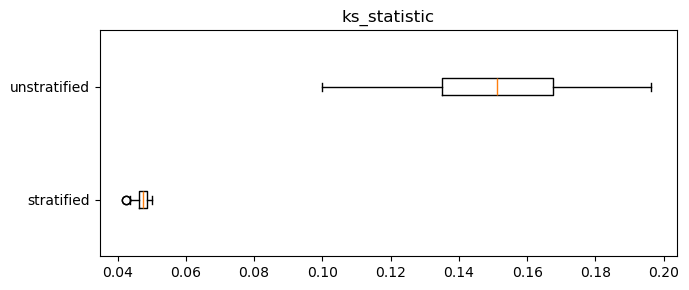

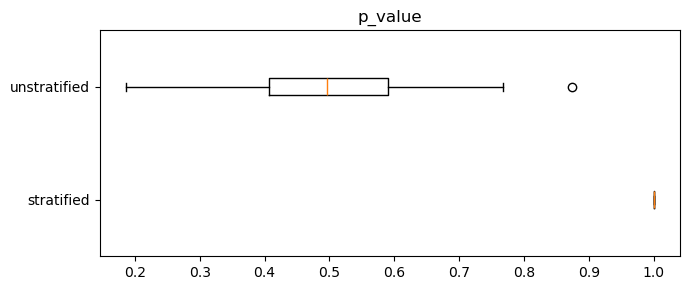

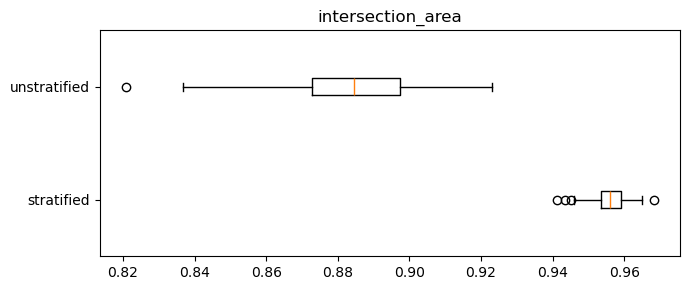

In [52]:
result_descreptives2 = descreptives(data_filtered_2, path_evaluation_plots + filtered_parameter + '_' + str(value2))

In [53]:
print(filtered_parameter, value1) 
result_descreptives1

model_info_noise 0


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
ks_statistic,0.047115,0.001690,0.148542,0.025529,-0.101427,-0.023838
p_value,0.999997,0.000001,0.519260,0.153808,0.480736,-0.153806
intersection_area,0.952767,0.005499,0.881487,0.020176,0.071281,-0.014677


In [54]:
print(filtered_parameter, value2) 
result_descreptives2

model_info_noise 3


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
ks_statistic,0.047031,0.001715,0.150521,0.020387,-0.103490,-0.018672
p_value,0.999997,0.000001,0.502378,0.133537,0.497619,-0.133536
intersection_area,0.955987,0.004655,0.883892,0.019225,0.072095,-0.014570


### Negative mean MSE
cv_unstratified_iterations_mean_test_score, cv_unstratified_iterations_std_test_score, cv_stratified_iterations_mean_test_score, cv_stratified_iterations_std_test_score

In [55]:
print(filtered_parameter, value1)
MSE1_unstratified = np.mean(data_filtered_1['cv_unstratified_iterations_mean_test_score'].explode().tolist())
SD1_unstratified = np.sqrt(np.var(data_filtered_1['cv_unstratified_iterations_std_test_score'].explode().tolist()))
MSE1_stratified = np.mean(data_filtered_1['cv_stratified_iterations_mean_test_score'].explode().tolist())
SD1_stratified = np.sqrt(np.var(data_filtered_1['cv_stratified_iterations_std_test_score'].explode().tolist()))

print(f"Unstratified: Negative MSE {MSE1_unstratified} with sd of  {SD1_unstratified}")
print(f"Stratified: Negative MSE {MSE1_stratified} with sd of {SD1_stratified}")

model_info_noise 0
Unstratified: Negative MSE -7.354644380447799 with sd of  0.6242810493386071
Stratified: Negative MSE -7.2081773351765355 with sd of 0.3974804889085135


In [56]:
print(filtered_parameter, value2)
MSE2_unstratified = np.mean(data_filtered_2['cv_unstratified_iterations_mean_test_score'].explode().tolist())
SD2_unstratified = np.sqrt(np.var(data_filtered_2['cv_unstratified_iterations_std_test_score'].explode().tolist()))
MSE2_stratified = np.mean(data_filtered_2['cv_stratified_iterations_mean_test_score'].explode().tolist())
SD2_stratified = np.sqrt(np.var(data_filtered_2['cv_stratified_iterations_std_test_score'].explode().tolist()))

print(f"Unstratified: Negative MSE {MSE2_unstratified} with sd of  {SD2_unstratified}")
print(f"Stratified: Negative MSE {MSE2_stratified} with sd of {SD2_stratified}")

model_info_noise 3
Unstratified: Negative MSE -16.54354407601883 with sd of  1.2588252355280996
Stratified: Negative MSE -16.23817318230076 with sd of 0.8921259663087651


In [57]:
print(filtered_parameter)
MSE_diff1 = MSE1_stratified - MSE1_unstratified
MSE_diff2 = MSE2_stratified - MSE2_unstratified

SD_diff1 = SD1_stratified - SD1_unstratified  #@TBD
SD_diff2 = SD2_stratified - SD2_unstratified  #@TBD

print(f"Difference in MSE with {filtered_parameter} = {value1} : {MSE_diff1}")
print(f"Difference in MSE {filtered_parameter} = {value2} : {MSE_diff2}")

print(f"Difference in SD with {filtered_parameter} = {value1} : {SD_diff1}")
print(f"Difference in SD {filtered_parameter} = {value2} : {SD_diff2}")


######## Alternative: @TBD, almost the same, but methodologically right I think
diff = np.array(data_filtered_1['cv_stratified_iterations_mean_test_score'].explode().tolist()) - np.array(data_filtered_1['cv_unstratified_iterations_mean_test_score'].explode().tolist())
diff_mean = diff.mean()
diff_mean
#@Nadja: always take absolute MSE


model_info_noise
Difference in MSE with model_info_noise = 0 : 0.14646704527126353
Difference in MSE model_info_noise = 3 : 0.30537089371807014
Difference in SD with model_info_noise = 0 : -0.22680056043009356
Difference in SD model_info_noise = 3 : -0.3666992692193345


0.14646704527126403

In [58]:

def plot_combined_boxplots(data_x, data_y, title, path):
    # check data format
    data_x = np.array(data_x).flatten()
    data_y = np.array(data_y).flatten()
    # plot boxplots
    _, ax = plt.subplots(figsize=(7, 3))
    ax.boxplot([data_x, data_y], vert=False, labels=['stratified', 'unstratified'], showfliers=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(path)
    plt.show()

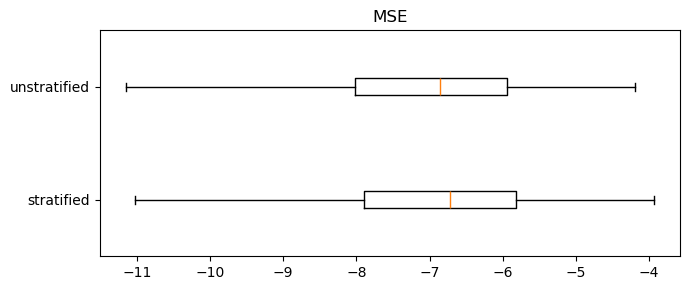

In [59]:
plot_combined_boxplots(data_filtered_1['cv_stratified_iterations_mean_test_score'].explode().tolist(), data_filtered_1['cv_unstratified_iterations_mean_test_score'].explode().tolist(), title = 'MSE', path= path_evaluation_plots + filtered_parameter + '_' + str(value1) + '_MSE')

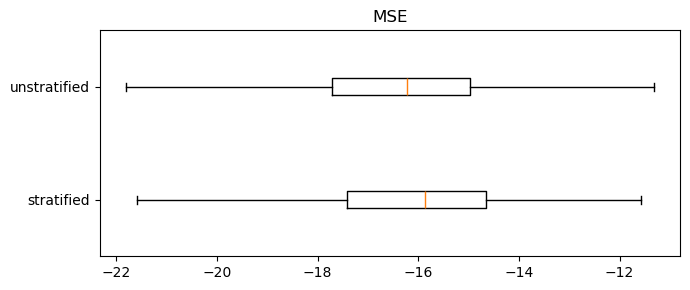

In [60]:
plot_combined_boxplots(data_filtered_2['cv_stratified_iterations_mean_test_score'].explode().tolist(), data_filtered_2['cv_unstratified_iterations_mean_test_score'].explode().tolist(), title = 'MSE', path= path_evaluation_plots + filtered_parameter + '_' + str(value2) + '_MSE')

### Rank correlation
1. Rank correltation between cv_stratified_iterations_rank_test_score and cv_unstratified_iterations_rank_test_score
2. Rank corretnaiton between refitted test MSE und cv_stratified_iterations_rank_test_score & cv_unstratified_iterations_rank_test_score (TBD)

In [61]:
len(np.array(data['cv_stratified_iterations_mean_test_score'])[0])

200

In [62]:
from scipy.stats import spearmanr
def spearman_correlation(data, var1 , var2):
    correlation_coefficient_list = []
    p_value_list = []

    # Calculate Spearman's correlation coefficient and p-value for each iteration
    for i in range(len(data['cv_stratified_iterations_mean_test_score'])):
        correlation_coefficient, p_value = spearmanr(np.array(data[var1])[i], np.array(data[var2])[i])
        correlation_coefficient_list.append(correlation_coefficient)
        p_value_list.append(p_value)

    # Print the mean and variance of the correlation coefficient
    print("Mean of correlation coefficient:", np.mean(correlation_coefficient_list))
    print("Variance of correlation coefficient:", np.var(correlation_coefficient_list))

    # Print the mean and variance of the p-value
    print("Mean of p-value:", np.mean(p_value_list))
    print("Variance of p-value:", np.var(p_value_list), '\n')

In [63]:
#1. Rank between cv_stratified_iterations_rank_test_score and cv_unstratified_iterations_rank_test_score
print(filtered_parameter, value1)
spearman_correlation(data_filtered_1, var1 = 'cv_stratified_iterations_mean_test_score', var2 = 'cv_unstratified_iterations_mean_test_score')

#2. Rank corretnaiton between refitted test MSE und cv_stratified_iterations_rank_test_score & cv_unstratified_iterations_rank_test_score (TBD)
spearman_correlation(data_filtered_1, var1 = 'cv_iteration_refit_test_mse', var2 = 'cv_stratified_iterations_mean_test_score')
spearman_correlation(data_filtered_1, var1 = 'cv_iteration_refit_test_mse', var2 = 'cv_unstratified_iterations_mean_test_score')


model_info_noise 0
Mean of correlation coefficient: 0.9938219301098518
Variance of correlation coefficient: 2.894843836166073e-05
Mean of p-value: 4.754853561073509e-114
Variance of p-value: 2.6904272540831576e-225 

Mean of correlation coefficient: -0.9883066031509766
Variance of correlation coefficient: 0.00016399391716261444
Mean of p-value: 2.8315158678352355e-80
Variance of p-value: 9.480515951175664e-158 

Mean of correlation coefficient: -0.9876964552170977
Variance of correlation coefficient: 0.00016299526472076067
Mean of p-value: 3.7409192984182734e-84
Variance of p-value: 1.6653427864761147e-165 



In [64]:
#1. Rank between cv_stratified_iterations_rank_test_score and cv_unstratified_iterations_rank_test_score
print(filtered_parameter, value2)
spearman_correlation(data_filtered_2, var1 = 'cv_stratified_iterations_mean_test_score', var2 = 'cv_unstratified_iterations_mean_test_score')

#2. Rank corretnaiton between refitted test MSE und cv_stratified_iterations_rank_test_score & cv_unstratified_iterations_rank_test_score (TBD)
spearman_correlation(data_filtered_2, var1 = 'cv_iteration_refit_test_mse', var2 = 'cv_stratified_iterations_mean_test_score')
spearman_correlation(data_filtered_2, var1 = 'cv_iteration_refit_test_mse', var2 = 'cv_unstratified_iterations_mean_test_score')

model_info_noise 3
Mean of correlation coefficient: 0.9711925062860455
Variance of correlation coefficient: 0.0008004600435157161
Mean of p-value: 1.507763270769733e-51
Variance of p-value: 2.7052865960118687e-100 

Mean of correlation coefficient: -0.9480268602494871
Variance of correlation coefficient: 0.002730341183015404
Mean of p-value: 1.9728377971757998e-36
Variance of p-value: 3.1594683653065375e-70 

Mean of correlation coefficient: -0.9386050027726538
Variance of correlation coefficient: 0.004880392429669224
Mean of p-value: 2.384269259169821e-21
Variance of p-value: 6.764840481264341e-40 



#### Error of Estimator

In [65]:
def error_estimator(data, path):
    gen_error_stratified_list = []
    gen_error_unstratified_list = []

    for i in range(len(data)):
        # generalisation error: stratified
        gen_error_stratified = np.array(data['cv_iteration_refit_test_mse'])[i] + np.array(data['cv_stratified_iterations_mean_test_score'])[i]
        gen_error_stratified_list.append(gen_error_stratified)
        # generalisation error: unstratified
        gen_error_unstratified = np.array(data['cv_iteration_refit_test_mse'])[i] + np.array(data['cv_unstratified_iterations_mean_test_score'])[i]
        gen_error_unstratified_list.append(gen_error_unstratified)

    mean_stratified = np.mean(gen_error_stratified_list)
    sd_stratified = np.sqrt(np.var(gen_error_stratified_list))
    mean_unstratified = np.mean(gen_error_unstratified_list)
    sd_unstratified = np.sqrt(np.var(gen_error_unstratified_list))
    mean_diff = mean_stratified - mean_unstratified
    sd_diff = sd_stratified - sd_unstratified

    #data frame
    df_result = pd.DataFrame({'mean_stratified': mean_stratified, 'sd_stratified': sd_stratified, 
                                'mean_unstratified': mean_unstratified, 'sd_unstratified': sd_unstratified,
                                'mean_diff': mean_diff, 'sd_diff': sd_diff},
                                index= ['gen_error'])


    # plot gen_error_stratified and gen_error_unstratified in two boxplots next to each other
    plot_combined_boxplots(gen_error_stratified_list, gen_error_unstratified_list, title = 'Error of Estimator', path= path)
    return df_result


model_info_noise 0


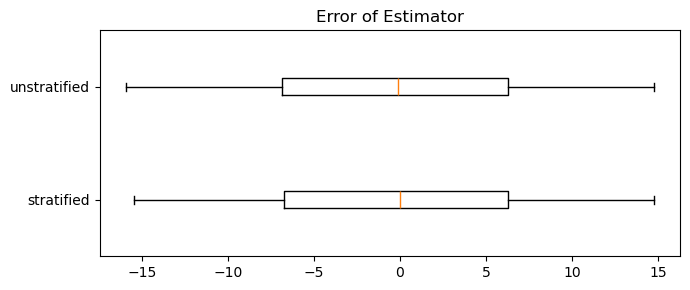

In [66]:
print(filtered_parameter, value1)
error_estimator1 = error_estimator(data_filtered_1, path = path_evaluation_plots + filtered_parameter + '_' + str(value1) + '_estimator_error')

model_info_noise 3


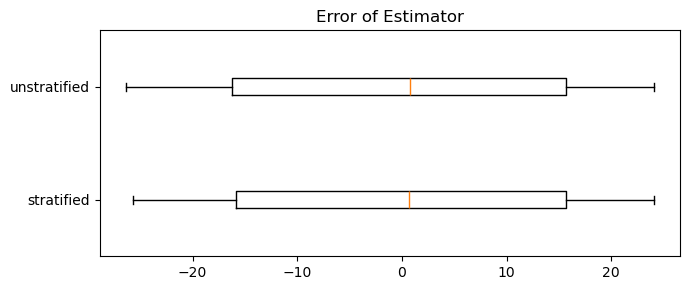

In [67]:
print(filtered_parameter, value2)
error_estimator2 = error_estimator(data_filtered_2, path = path_evaluation_plots + filtered_parameter + '_' + str(value2) + '_estimator_error')

In [68]:
print(filtered_parameter, value1)
error_estimator1 

model_info_noise 0


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
gen_error,-0.201014,7.274638,-0.274248,7.349986,0.073234,-0.075347


In [69]:
print(filtered_parameter, value2)
error_estimator2

model_info_noise 3


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
gen_error,-0.040919,16.321397,-0.193605,16.476124,0.152685,-0.154727


## Best Hyperparameters

(array([0, 1, 2, 3, 4]),
 [52, 49, 15, 3, 1],
 array([0, 1, 2, 3]),
 [47, 46, 23, 4])

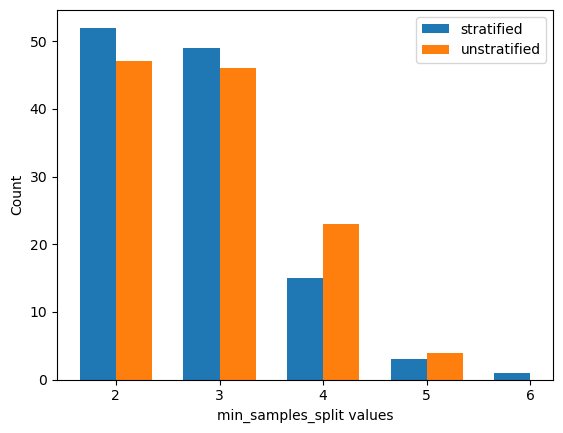

In [105]:
import matplotlib.pyplot as plt
import numpy as np

def grouped_bar_plot_hyperparameters(data_stratified, data_unstratified, hyperparameter, path_evaluation_plots):
    data_stratified = list(data_stratified)
    data_unstratified = list(data_unstratified)

    unique_values1 = np.unique(data_stratified) #sorted unique elements of an array.
    unique_values2 = np.unique(data_unstratified)

    num_unique1 = len(unique_values1)
    num_unique2 = len(unique_values2)

    counts_stratified = [data_stratified.count(val) for val in unique_values1]
    counts_unstratifed = [data_unstratified.count(val) for val in unique_values2]

    width = 0.35  # Width of each bar

    fig, ax = plt.subplots()
    bars1 = ax.bar(np.arange(num_unique1), counts_stratified , width, label= 'stratified') 
    bars2 = ax.bar(np.arange(num_unique2) + width, counts_unstratifed, width, label= 'unstratified')

    ax.set_xlabel(hyperparameter +' values')
    ax.set_ylabel('Count')
    ax.set_xticks(np.arange(num_unique1) + width / 2)
    ax.set_xticklabels(unique_values1)
    ax.legend()
    #plt.savefig(path_evaluation_plots + hyperparameter + '_grouped_bar_plot')
    return np.arange(num_unique1), counts_stratified, np.arange(num_unique2), counts_unstratifed


grouped_bar_plot_hyperparameters(data_filtered_1['stratified_best_params_min_samples_split'], data_filtered_1['unstratified_best_params_min_samples_split'], hyperparameter = 'min_samples_split', path_evaluation_plots = path_evaluation_plots )

[2 4 3 5 6]


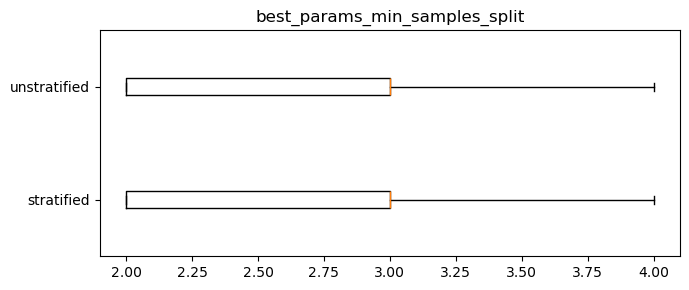

<BarContainer object of 9 artists>

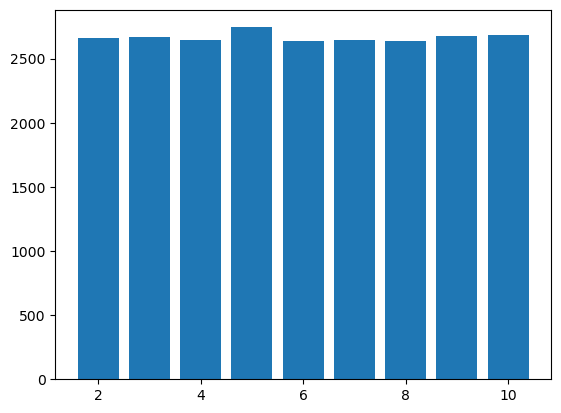

In [70]:
#cv_stratified_iterations_param_min_samples_split
cv_stratified_iterations_param_min_samples_split_counts = np.unique(np.array(data_filtered_1['cv_stratified_iterations_param_min_samples_split'].explode().tolist()), return_counts=True)
print(data_filtered_1['stratified_best_params_min_samples_split'].unique())
plot_combined_boxplots(data_x= data_filtered_1['stratified_best_params_min_samples_split'], data_y = data_filtered_1['unstratified_best_params_min_samples_split'], title= "best_params_min_samples_split", path=path_evaluation_plots + filtered_parameter + '_' + str(value1)+ '_best_params_min_samples_split')

plt.bar(cv_stratified_iterations_param_min_samples_split_counts[0], cv_stratified_iterations_param_min_samples_split_counts[1])

[1 2]


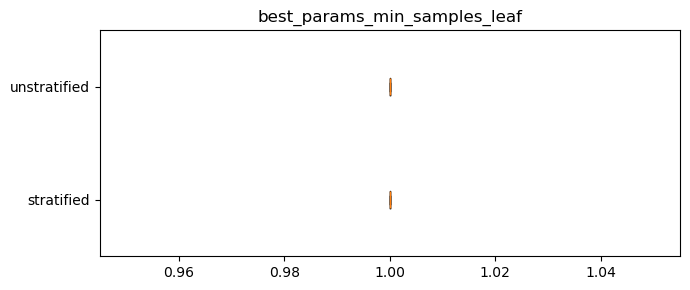

<BarContainer object of 10 artists>

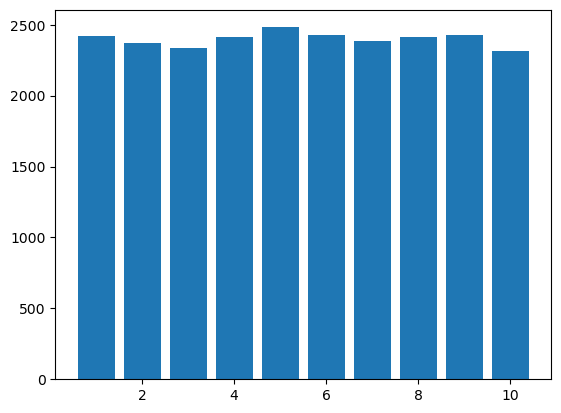

In [71]:
cv_stratified_iterations_param_min_samples_leaf_counts = np.unique(np.array(data_filtered_1['cv_stratified_iterations_param_min_samples_leaf'].explode().tolist()), return_counts=True)
print(data_filtered_1['stratified_best_params_min_samples_leaf'].unique())
plot_combined_boxplots(data_x= data_filtered_1['stratified_best_params_min_samples_leaf'], data_y = data_filtered_1['unstratified_best_params_min_samples_leaf'], title= "best_params_min_samples_leaf", path=path_evaluation_plots + filtered_parameter + '_' + str(value1)+ '_best_params_min_samples_leaf')

plt.bar(cv_stratified_iterations_param_min_samples_leaf_counts[0], cv_stratified_iterations_param_min_samples_leaf_counts[1])

[4 5 6 8 7 3]


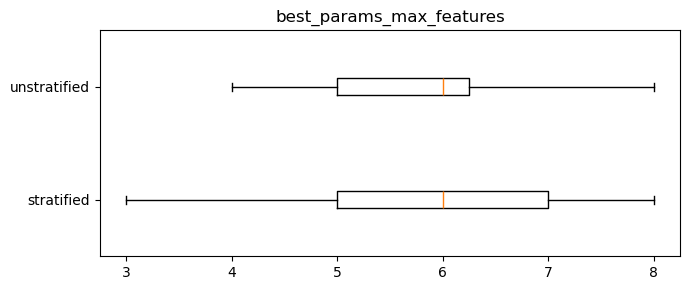

<BarContainer object of 8 artists>

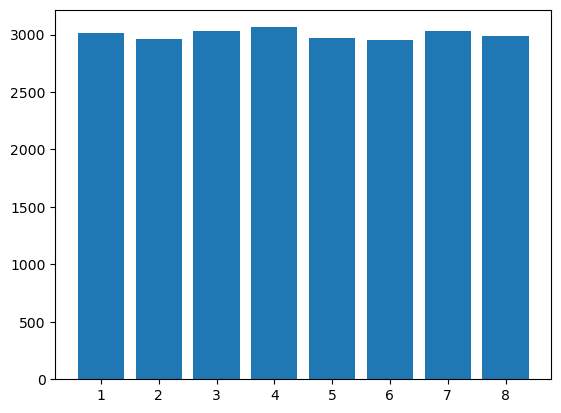

In [72]:
cv_stratified_iterations_param_max_features_counts = np.unique(np.array(data_filtered_1['cv_stratified_iterations_param_max_features'].explode().tolist()), return_counts=True)
print(data_filtered_1['stratified_best_params_max_features'].unique())
plot_combined_boxplots(data_x= data_filtered_1['stratified_best_params_max_features'], data_y = data_filtered_1['unstratified_best_params_max_features'], title= "best_params_max_features", path=path_evaluation_plots + filtered_parameter + '_' + str(value1)+ '_best_params_max_features')

plt.bar(cv_stratified_iterations_param_max_features_counts[0], cv_stratified_iterations_param_max_features_counts[1])

### Evaluation metrics with best hyperparmeters: 'unstratified_results' and 'stratified_results'
'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae'  


Interpretation: More or less useless? If chosen hyperparameter have better performance?

If same hyperaparameter, diff = 0

In [73]:
diff = data_filtered_1['stratified_results_train r2'] - data_filtered_1['unstratified_results_train r2']
print(diff.mean())

diff = data_filtered_1['stratified_results_test r2'] - data_filtered_1['unstratified_results_test r2']
print(diff.mean())

2.3495083333333057e-05
-7.99476666666706e-05


In [74]:
diff = data_filtered_1['stratified_results_train mae'] - data_filtered_1['unstratified_results_train mae']
print(diff.mean())

diff = data_filtered_1['stratified_results_test mae'] - data_filtered_1['unstratified_results_test mae']
print(diff.mean())

-0.00023037208333333465
0.00019082791666666932


In [75]:
diff = data_filtered_1['stratified_results_train mse'] - data_filtered_1['unstratified_results_train mse']
print(diff.mean())

diff = data_filtered_1['stratified_results_test mse'] - data_filtered_1['unstratified_results_test mse']
print(diff.mean())

-0.001368205750000001
0.001908849583333357


data_filtered_1 shape: (120, 75)
data_filtered_2 shape: (120, 75)


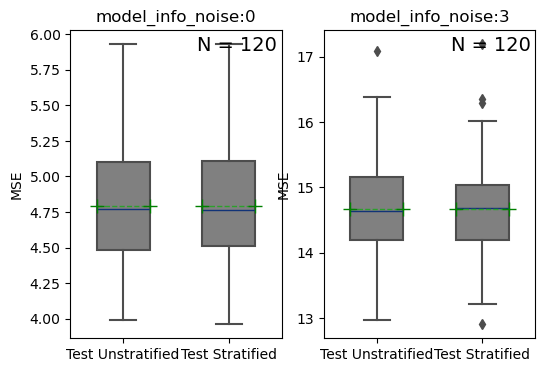

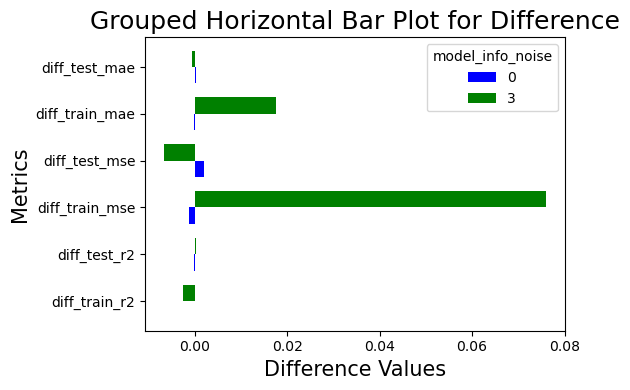

                mean_diff   sd_diff
diff_train_r2    0.000023  0.005323
diff_test_r2    -0.000080  0.003668
diff_train_mse  -0.001368  0.121779
diff_test_mse    0.001909  0.087587
diff_train_mae  -0.000230  0.047026
diff_test_mae    0.000191  0.015770
                mean_diff   sd_diff
diff_train_r2   -0.002465  0.029717
diff_test_r2     0.000202  0.006249
diff_train_mse   0.075949  0.970626
diff_test_mse   -0.006622  0.205196
diff_train_mae   0.017668  0.200985
diff_test_mae   -0.000626  0.021520


In [76]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": 'identity',
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": None,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 0
value2 = 3

df1, df2 = plots_per_condition(data, parameter_grid, value1, value2)
print(df1)
print(df2)

data_filtered_1 shape: (120, 75)
data_filtered_2 shape: (120, 75)


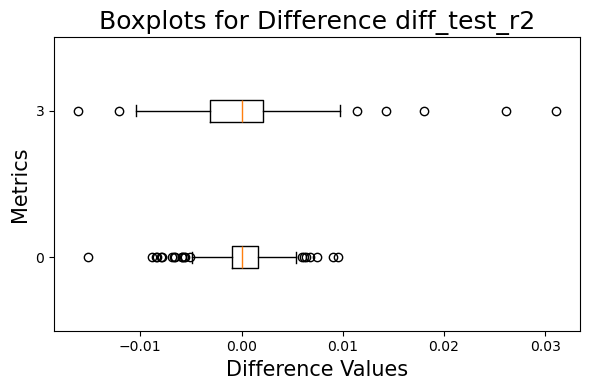

In [77]:
def differences_eval(data):
    data_diff = pd.DataFrame()
    data_diff['diff_train_r2'] = data['stratified_results_train r2'] - data['unstratified_results_train r2']
    data_diff['diff_test_r2'] = data['stratified_results_test r2'] - data['unstratified_results_test r2']
    data_diff['diff_train_mse'] = data['stratified_results_train mse'] - data['unstratified_results_train mse']
    data_diff['diff_test_mse'] = data['stratified_results_test mse'] - data['unstratified_results_test mse']
    data_diff['diff_train_mae'] = data['stratified_results_train mae'] - data['unstratified_results_train mae']
    data_diff['diff_test_mae'] = data['stratified_results_test mae'] - data['unstratified_results_test mae']
    return data_diff

def plots_per_condition(data, conditions, value1, value2):
    # filter data
    data_filtered_1, data_filtered_2, value1, value2, filtered_parameter = filter_data(data, conditions, value1, value2)
    # plot difference seperatly
    data_diff1 = differences_eval(data_filtered_1)
    data_diff2 = differences_eval(data_filtered_2)

    # plot boxplots
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.boxplot([data_diff1['diff_test_r2'], data_diff2['diff_test_r2']], vert=False, labels=[str(value1), str(value2)], showfliers=True)

    # Adding labels, title, and legend
    ax.set_xlabel('Difference Values', fontsize=15)
    ax.set_ylabel('Metrics', fontsize=15)
    ax.set_title('Boxplots for Difference diff_test_r2', fontsize=18)

    # Display the plot
    plt.tight_layout()
    plt.show()

    return data_filtered_1, data_filtered_2


df1, df2 = plots_per_condition(data, parameter_grid, value1, value2)

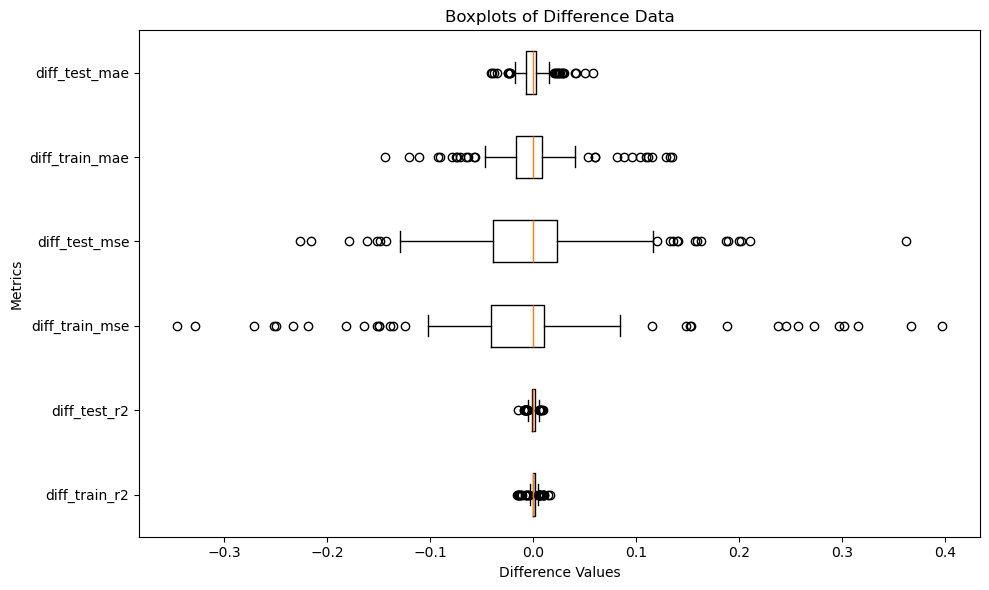

In [78]:
def differences_eval(data):
    data_diff = pd.DataFrame()
    data_diff['diff_train_r2'] = data['stratified_results_train r2'] - data['unstratified_results_train r2']
    data_diff['diff_test_r2'] = data['stratified_results_test r2'] - data['unstratified_results_test r2']
    data_diff['diff_train_mse'] = data['stratified_results_train mse'] - data['unstratified_results_train mse']
    data_diff['diff_test_mse'] = data['stratified_results_test mse'] - data['unstratified_results_test mse']
    data_diff['diff_train_mae'] = data['stratified_results_train mae'] - data['unstratified_results_train mae']
    data_diff['diff_test_mae'] = data['stratified_results_test mae'] - data['unstratified_results_test mae']
    return data_diff

diff_data = differences_eval(data_filtered_1)

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot boxplots for each column of diff_data
ax.boxplot(diff_data.values, vert=False, labels=diff_data.columns)

# Set the title and labels
ax.set_title('Boxplots of Difference Data')
ax.set_xlabel('Difference Values')
ax.set_ylabel('Metrics')

# Display the plot
plt.tight_layout()
plt.show()


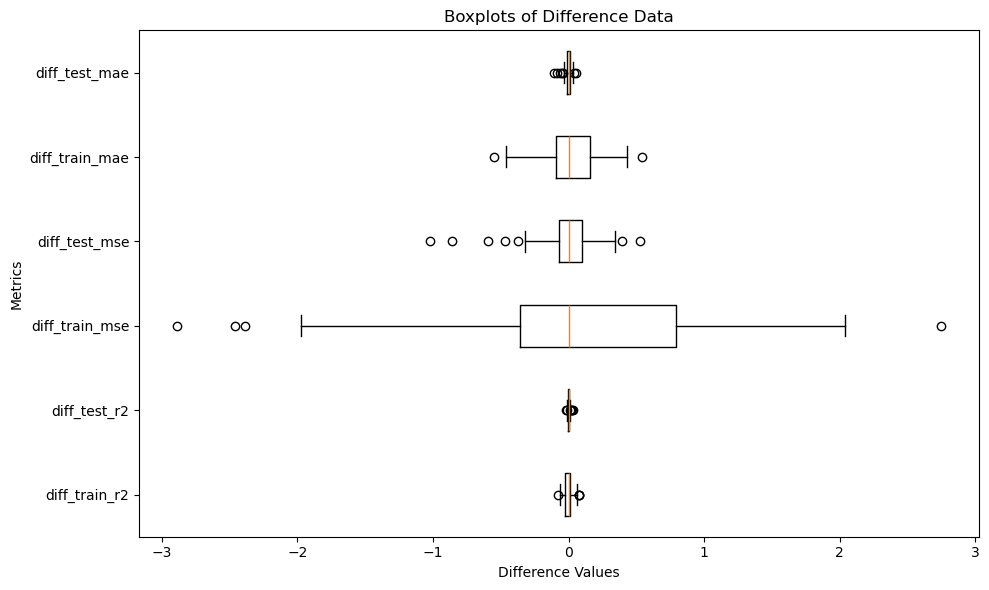

In [79]:
diff_data = differences_eval(data_filtered_2)

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot boxplots for each column of diff_data
ax.boxplot(diff_data.values, vert=False, labels=diff_data.columns)

# Set the title and labels
ax.set_title('Boxplots of Difference Data')
ax.set_xlabel('Difference Values')
ax.set_ylabel('Metrics')

# Display the plot
plt.tight_layout()
plt.show()

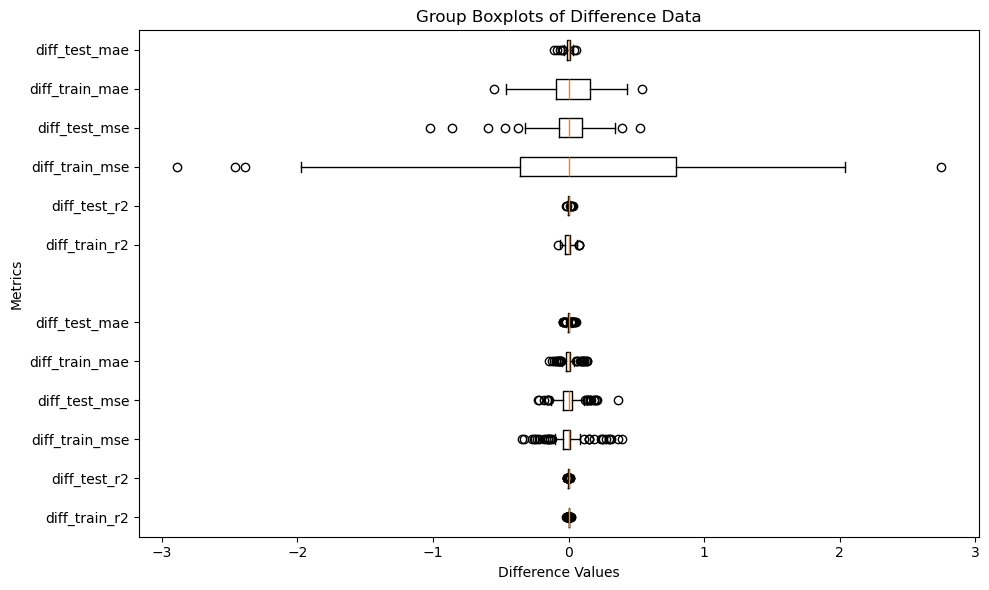

In [80]:
diff_data1 = differences_eval(data_filtered_1)
diff_data2 = differences_eval(data_filtered_2)

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot group boxplots for each column of diff_data1 and diff_data2
ax.boxplot([diff_data1[column] for column in diff_data1.columns], positions=range(1, len(diff_data1.columns) + 1), vert=False, labels=diff_data1.columns)
ax.boxplot([diff_data2[column] for column in diff_data2.columns], positions=range(len(diff_data1.columns) + 2, len(diff_data1.columns) + len(diff_data2.columns) + 2), vert=False, labels=diff_data2.columns)

# Set the title and labels
ax.set_title('Group Boxplots of Difference Data')
ax.set_xlabel('Difference Values')
ax.set_ylabel('Metrics')

# Display the plot
plt.tight_layout()
plt.show()


      index  condition         metric     value
0        20          0  diff_train_r2  0.000000
1        21          0  diff_train_r2  0.000021
2        22          0  diff_train_r2  0.000298
3        23          0  diff_train_r2  0.000000
4        24          0  diff_train_r2  0.002651
...     ...        ...            ...       ...
1435   2435          3  diff_test_mae  0.000000
1436   2436          3  diff_test_mae  0.026221
1437   2437          3  diff_test_mae  0.033740
1438   2438          3  diff_test_mae -0.017963
1439   2439          3  diff_test_mae  0.014066

[1440 rows x 4 columns]


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'diff_train_r2'),
  Text(1, 0, 'diff_test_r2'),
  Text(2, 0, 'diff_train_mse'),
  Text(3, 0, 'diff_test_mse'),
  Text(4, 0, 'diff_train_mae'),
  Text(5, 0, 'diff_test_mae')])

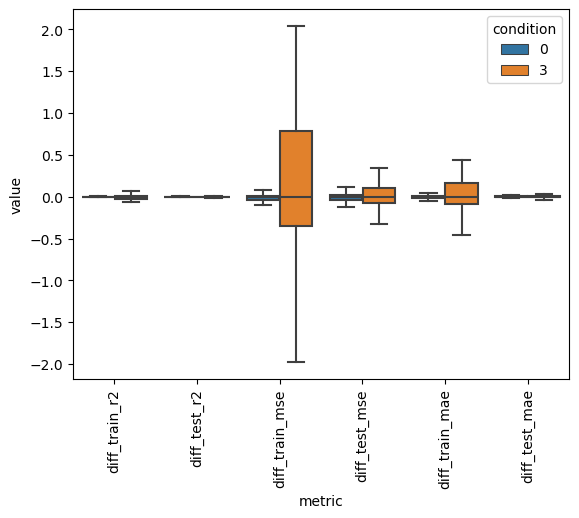

In [81]:
# Use the melt function to convert to long format
diff_data1 = differences_eval(data_filtered_1)
diff_data2 = differences_eval(data_filtered_2)
diff_data1["condition"] = value1
diff_data2["condition"] = value2
diff_data = pd.concat([diff_data1, diff_data2])
diff_data1_long = pd.melt(diff_data.reset_index(), id_vars=['index', 'condition'], var_name='metric', value_name='value')

# Display the long-format data
print(diff_data1_long)

sns.boxplot(x=diff_data1_long['metric'], 
            y=diff_data1_long['value'], 
            hue=diff_data1_long['condition'],
            showfliers=False)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)


### Save results

In [82]:
def save_metrics_to_csv(file_path, model_name, mae_error, mse_error, mae_per_channel, mse_per_channel, mae_per_frame, mse_per_frame, mae_derivative, mse_derivative, fvd_metric, mae_optical_flow, mse_optical_flow):
    timestamp = datetime.now().strftime('%Y-%m-%d--%H-%M-%S')
    header = ['timestamp', 'model_name', 'mae', 'mse', 'mae_per_channel', 'mse_per_channel', 'mae_per_frame', 'mse_per_frame', 'mae_derivative', 'mse_derivative', 'fvd_metric', 'mae_optical_flow', 'mse_optical_flow']
    data = [timestamp, model_name, mae_error, mse_error, mae_per_channel, mse_per_channel, mae_per_frame, mse_per_frame, mae_derivative, mse_derivative, fvd_metric, mae_optical_flow, mse_optical_flow]

    if not os.path.exists(file_path):
        with open(file_path, 'w', newline='') as f:
            csv_writer = csv.writer(f)
            csv_writer.writerow(header)
        
    with open(file_path, 'a', newline='') as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(data)

    
    
    
    
    
    with open(path_evaluation_tables + filtered_parameter, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        # Writing an empty row to ensure the file is not completely empty
        csv_writer.writerow([])

In [83]:
#TBD: Ranks Feurer